# Card Perspective Transformation
This code converts card image from perspective view to parallel view.

#### Very Important Note:
This code is based on two assumptions:
1. Black smooth back ground.
2. Two card positions as shown below.

The code coverts original image from color mode to gray mode, then it applys some filters on image in order to clear it, then it applys adaptive gaussian thresholding to hihglight card edges, and finaly it uses numpy where function (np.where( )) to get min & max points as shown in the next figure:

![alt text](StudyCardPositions-S.jpg "Card Positions")

#### From The Above Figure You Can Derive The Following Proof:
I ==> represents index of X list, or Y list

$L1 = \sqrt{[X(I_{min-y}) - X(I_{min-x})]^{2} + [Y(I_{min-x}) - Y(I_{min-y})]^{2}}$

$L2 = \sqrt{[X(I_{max-y}) - X(I_{min-x})]^{2} + [Y(I_{max-y}) - Y(I_{min-x})]^{2}}$

#### At Image Position #1 (L1 > L2):

$P1 = [X(I_{min-x}), Y(I_{min-x})]$

$P2 = [X(I_{min-y}), Y(I_{min-y})]$

$P3 = [X(I_{max-x}), Y(I_{max-x})]$

$P4 = [X(I_{max-y}), Y(I_{max-y})]$

#### At Image Position #2 (L2 > L1):

$P1 = [X(I_{min-y}), Y(I_{min-y})]$

$P2 = [X(I_{max-x}), Y(I_{max-x})]$

$P3 = [X(I_{max-y}), Y(I_{max-y})]$

$P4 = [X(I_{min-x}), Y(I_{min-x})]$

In [1]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt

import math

Image Size (h, w) ,or (y, x): (864, 1152)


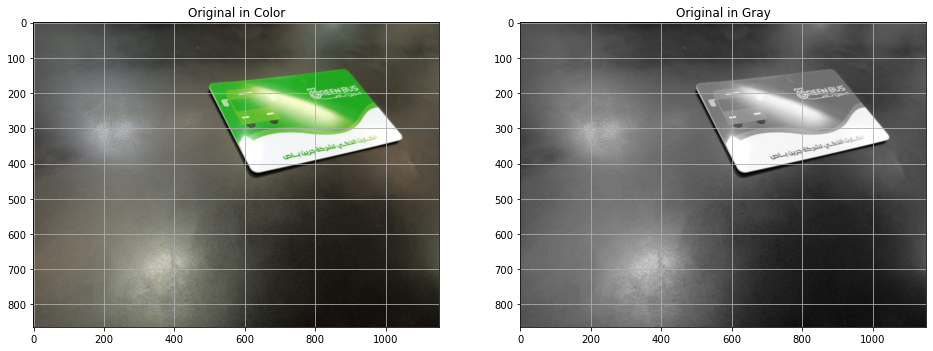

In [2]:
img = cv2.imread('green_card.jpeg',0)  # 0 For Gray scale
print(f'Image Size (h, w) ,or (y, x): {img.shape}')
img_2 = cv2.imread('green_card.jpeg')
img_2 = cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(16, 12))
plt.subplot(121),plt.imshow(img_2),plt.title('Original in Color')
plt.grid()
plt.subplot(122),plt.imshow(img, 'gray'),plt.title('Original in Gray')
plt.grid()
plt.show()


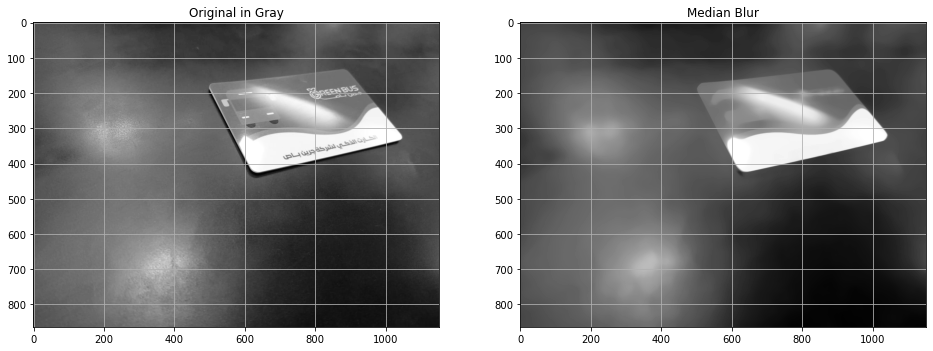

In [3]:
# Median Blur
img_3 = img.copy()
img_3 = cv2.medianBlur(img,31)

plt.figure(figsize=(16, 12))
plt.grid()
plt.subplot(121),plt.imshow(img, 'gray'),plt.title('Original in Gray')
plt.grid()
plt.subplot(122),plt.imshow(img_3, 'gray'),plt.title('Median Blur')
plt.grid()
plt.show()

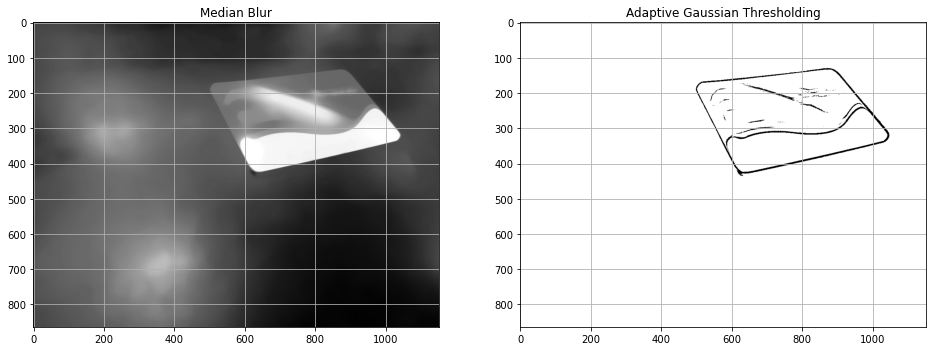

In [4]:
# Adaptive Gaussian Thresholding
img_4 = img_3.copy()
img_4 = cv2.adaptiveThreshold(img_3,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)

plt.figure(figsize=(16, 12))
plt.subplot(121),plt.imshow(img_3, 'gray'),plt.title('Median Blur')
plt.grid()
plt.subplot(122),plt.imshow(img_4, 'gray'),plt.title('Adaptive Gaussian Thresholding')
plt.grid()
plt.show()

In [5]:
# Get Black (Shape) Points
shape_points = np.where(img_4 == 0)
shape_min = np.argmin(shape_points, axis=1)
shape_max = np.argmax(shape_points, axis=1)
i_minx = shape_min[1]
i_miny = shape_min[0]
i_maxx = shape_max[1]
i_maxy = shape_max[0]

L1 = math.sqrt((shape_points[0][i_minx] - shape_points[0][i_miny])**2 + (shape_points[1][i_miny] - shape_points[1][i_minx])**2)
L2 = math.sqrt((shape_points[0][i_maxy] - shape_points[0][i_minx])**2 + (shape_points[1][i_maxy] - shape_points[1][i_minx])**2)

print(str(L1))
print(str(L2))

376.3416001453998
279.08421668019855


In [6]:
if L1 > L2:
    p1 = [shape_points[1][i_minx], shape_points[0][i_minx]]
    p2 = [shape_points[1][i_miny], shape_points[0][i_miny]]
    p3 = [shape_points[1][i_maxx], shape_points[0][i_maxx]]
    p4 = [shape_points[1][i_maxy], shape_points[0][i_maxy]]
else:
    p1 = [shape_points[1][i_miny], shape_points[0][i_miny]]
    p2 = [shape_points[1][i_maxx], shape_points[0][i_maxx]]
    p3 = [shape_points[1][i_maxy], shape_points[0][i_maxy]]
    p4 = [shape_points[1][i_minx], shape_points[0][i_minx]]
    
print(f'P1= {p1[0]}, {p1[1]}')
print(f'P2= {p2[0]}, {p2[1]}')
print(f'P3= {p3[0]}, {p3[1]}')
print(f'P4= {p4[0]}, {p4[1]}')

P1= 499, 187
P2= 871, 130
P3= 1047, 316
P4= 627, 435


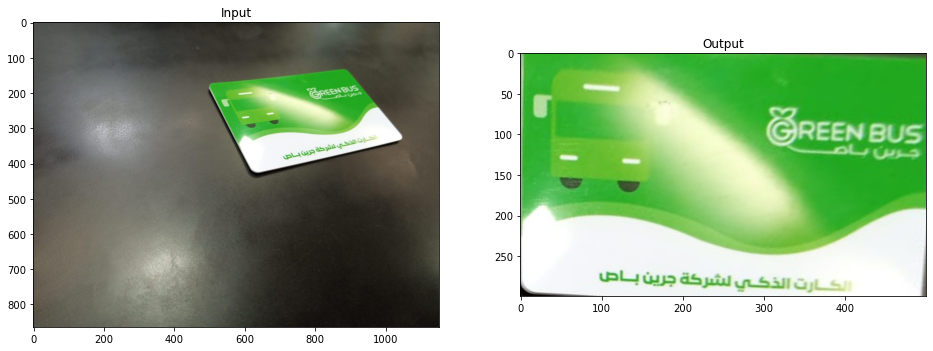

In [7]:
# Final 4 Points
pts1 = np.float32([p1, p2, p3, p4])
pts2 = np.float32([[0,0],[500,0],[500,300],[0,300]])

# Geting Perspective Transform Matrix
M = cv2.getPerspectiveTransform(pts1,pts2)

# Warp Perspective
dst = cv2.warpPerspective(img_2,M,(500,300))

plt.figure(figsize=(16, 12))
plt.subplot(121),plt.imshow(img_2),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()